In [45]:
#   Assignment No. 10 - Data Visualization III
#   Use Iris flower dataset and perform following operations. Scan the dataset and give the inference as: 
#   1. List down the features and their types (e.g., numeric, nominal) available in the dataset. 
#   2. Create a histogram for each feature in the dataset to illustrate the feature distributions. 
#   3. Compare distributions and identify outliers

In [46]:
#   import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#   Load iris dataset
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [47]:
#   1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

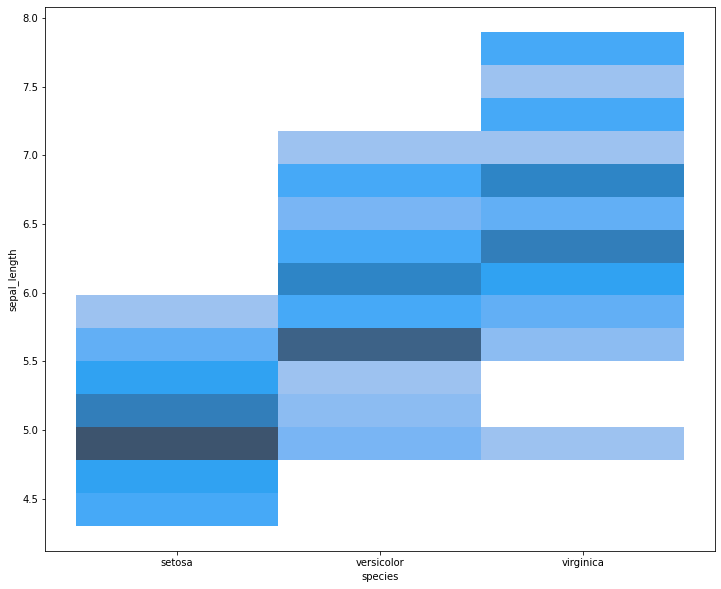

In [49]:
#   2. Create a histogram for each feature in the dataset to illustrate the feature distributions. 
plt.figure(figsize=(12,10))
sns.histplot(data=iris, x="species", y="sepal_length", bins=15)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

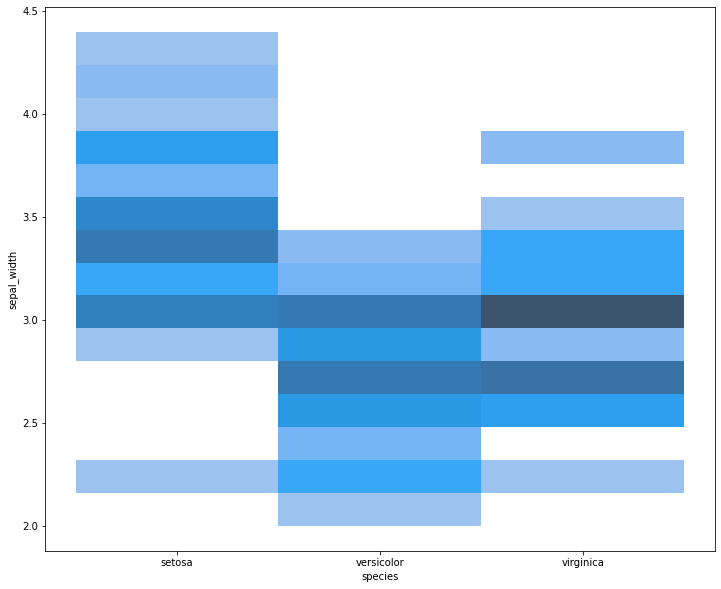

In [50]:
plt.figure(figsize=(12,10))
sns.histplot(data=iris, x="species", y="sepal_width", bins=15)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

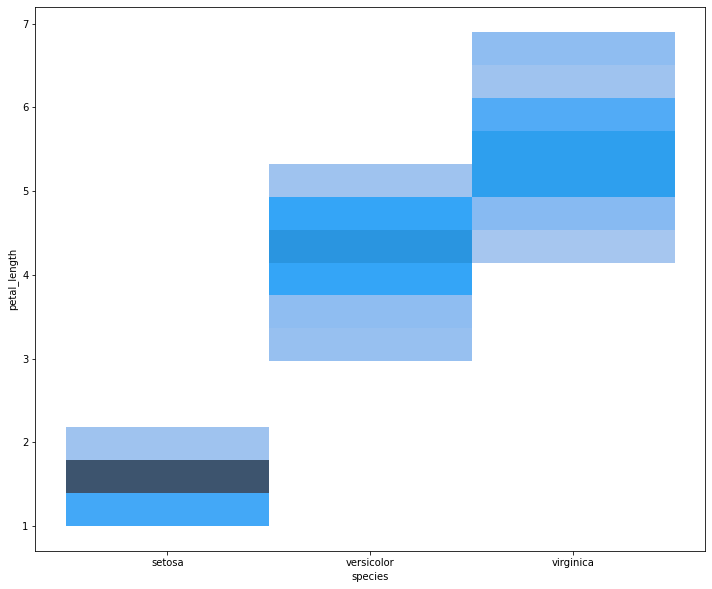

In [51]:
plt.figure(figsize=(12,10))
sns.histplot(data=iris, x="species", y="petal_length", bins=15)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

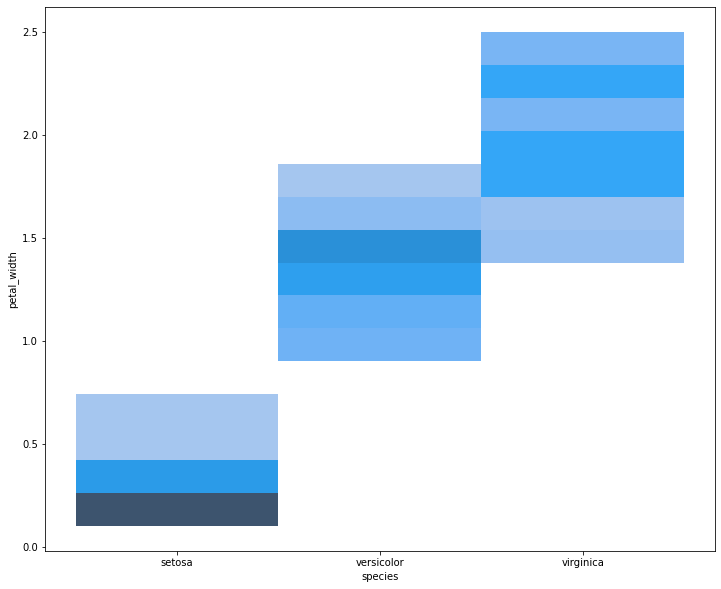

In [52]:
plt.figure(figsize=(12,10))
sns.histplot(data=iris, x="species", y="petal_width", bins=15)

<AxesSubplot:>

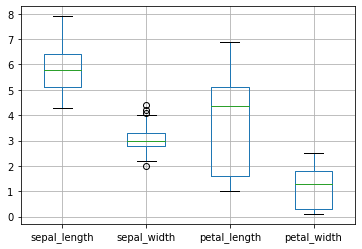

In [53]:
#   3. Compare distributions and identify outliers
#   For outliers we use Box plot

numerical_col = ['sepal_length','sepal_width','petal_length','petal_width']
categorical_col = ['species']
iris.boxplot(numerical_col)

#   in the below plot, we can see that the outliers lie in the upper and lower bound of the sepal width region

In [54]:
"""
Calculate the first and third quartile (Q1 and Q3).
Further, evaluate the interquartile range, IQR = Q3-Q1.
Estimate the lower bound, the lower bound = Q1*1.5
Estimate the upper bound, upper bound = Q3*1.5
Replace the data points that lie outside of the lower and the upper bound with a NULL value.
"""
for x in ['sepal_width']:
    q75,q25 = np.percentile(iris.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    iris.loc[iris[x] < min,x] = np.nan
    iris.loc[iris[x] > max,x] = np.nan

In [55]:
print("Sum of count of NULL values/outliers in each column of the dataset:")
iris.isnull().sum()

Sum of count of NULL values/outliers in each column of the dataset:


sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
species         0
dtype: int64

In [56]:
iris['sepal_width'].describe()
#   since the count is 146 we can use median of sepal_width column to replace the null values

iris['sepal_width'].fillna(iris['sepal_width'].median(), inplace=True)

In [57]:
#   check for null values and outliers again
iris.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

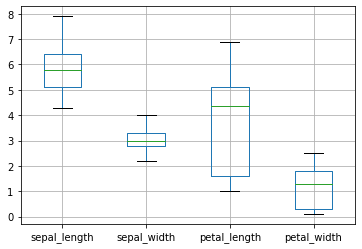

In [58]:
iris.boxplot(numerical_col)